## 作業

閱讀以下兩篇文獻，了解隨機森林原理，並試著回答後續的思考問題
- [隨機森林 (random forest) - 中文](http://hhtucode.blogspot.tw/2013/06/ml-random-forest.html)
- [how random forest works - 英文](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)


1. 隨機森林中的每一棵樹，是希望能夠

    - 沒有任何限制，讓樹可以持續生長 (讓樹生成很深，讓模型變得複雜)
    
> Answer: Yes, 可以持續生長, 單一顆樹 overfitting 沒有問題
    
    - 不要過度生長，避免 Overfitting
    
> Answer: No, 避免 overfitting 的原因, 是因為多顆樹 vote
    
    
2. 假設總共有 N 筆資料，每棵樹用取後放回的方式抽了總共 N 筆資料生成，請問這棵樹大約使用了多少 % 不重複的原資料生成?
hint: 0.632 bootstrap

> Answer: 大約 63.2% 是不重複的資料


------

## numpy.random.choice

```
numpy.random.choice(a, size=None, replace=True, p=None)
```
Generates a random sample from a given 1-D array

### Parameters:	
#### a : 1-D array-like or int

If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if a was np.arange(n)

#### size : int or tuple of ints, optional

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

#### replace : boolean, optional

Whether the sample is with or without replacement. (Note. 假如 replace=True, 表示可以重複, 否則不能重複)

#### p : 1-D array-like, optional

The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

### Returns:	
#### samples : 1-D ndarray, shape (size,)

The generated random samples

### Raises:	
ValueError

If a is an int and less than zero, if a or p are not 1-dimensional, if a is an array-like of size 0, if p is not a vector of probabilities, if a and p have different lengths, or if replace=False and the sample size is greater than the population size

------

In [10]:
# Reference from https://github.com/kevinpiger/ML-100Days/blob/master/Day041-045/Day_043_HW.ipynb 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

original_data_proportion = []
for i in np.arange(50, 10000,50):
    # Use np.random.choice to generate an array (boost_data, size=i) from i
    boost_data = np.random.choice(i, size=i, replace=True)
    # Count how many unique data inside boost_data
    original_data_proportion.append(len(np.unique(boost_data))/i)
    

In [11]:
print(original_data_proportion)

[0.68, 0.59, 0.6933333333333334, 0.6, 0.636, 0.61, 0.6314285714285715, 0.6275, 0.6444444444444445, 0.658, 0.6127272727272727, 0.6416666666666667, 0.6061538461538462, 0.6271428571428571, 0.6306666666666667, 0.6225, 0.6305882352941177, 0.6377777777777778, 0.6378947368421053, 0.63, 0.638095238095238, 0.6436363636363637, 0.6208695652173913, 0.6391666666666667, 0.6344, 0.6238461538461538, 0.6362962962962962, 0.6235714285714286, 0.623448275862069, 0.6133333333333333, 0.6412903225806451, 0.645, 0.6321212121212121, 0.63, 0.6291428571428571, 0.6366666666666667, 0.6367567567567568, 0.63, 0.6271794871794871, 0.6395, 0.6448780487804878, 0.6252380952380953, 0.633953488372093, 0.6281818181818182, 0.632, 0.6282608695652174, 0.6221276595744681, 0.6383333333333333, 0.6387755102040816, 0.6328, 0.6270588235294118, 0.6288461538461538, 0.6437735849056604, 0.6296296296296297, 0.64, 0.6260714285714286, 0.6312280701754386, 0.6275862068965518, 0.6389830508474577, 0.6336666666666667, 0.6301639344262295, 0.63451

In [12]:
np.mean(original_data_proportion)

0.6322520797682415

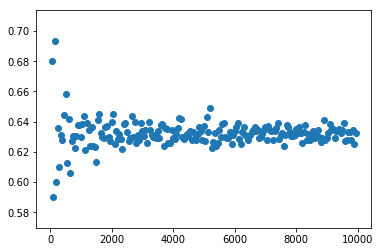

In [13]:
plt.scatter(np.arange(50, 10000,50), original_data_proportion)